# **Titanic Survival Prediction**

In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and Understanding Dataset

In [2]:
# loading dataset
titanic=pd.read_csv('/content/drive/MyDrive/Datasets/CodSoft/tested.xls')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
titanic.shape

(418, 12)

In [4]:
titanic.size

5016

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
titanic=titanic.drop(['Cabin'],axis=1)

In [13]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare']=titanic['Fare'].fillna(titanic['Fare'].mean())
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [15]:
titanic['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [16]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [17]:
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

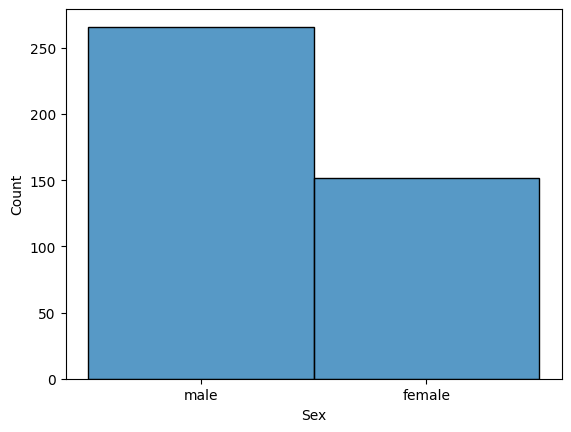

In [18]:
# histplot
sns.histplot(titanic,x='Sex')

<Axes: xlabel='Survived', ylabel='count'>

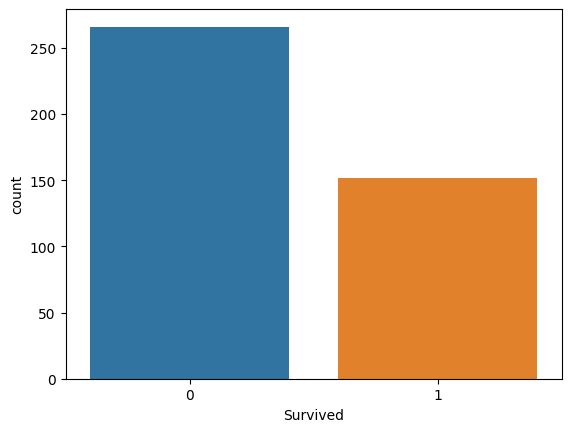

In [19]:
#countplot
sns.countplot(data=titanic,x='Survived')

<Axes: xlabel='Age', ylabel='Sex'>

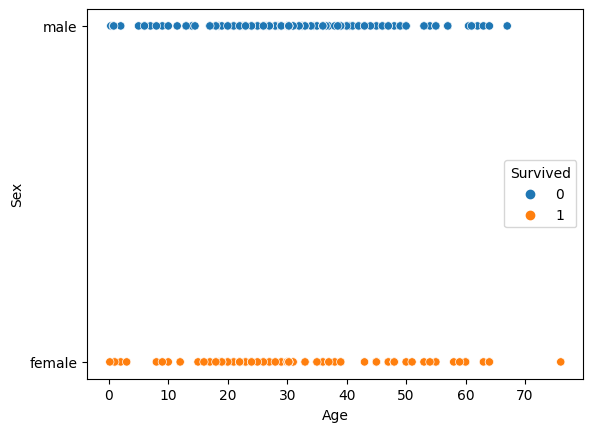

In [20]:
# scatterplot
sns.scatterplot(data=titanic,x='Age',y='Sex',hue='Survived')

<Axes: xlabel='Survived', ylabel='Age'>

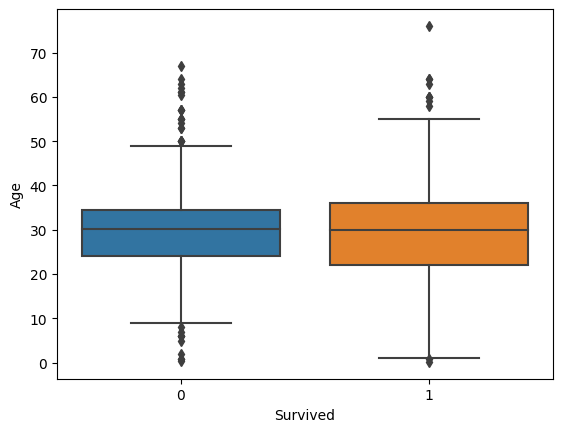

In [21]:
# boxplot
sns.boxplot(titanic,x='Survived',y='Age')

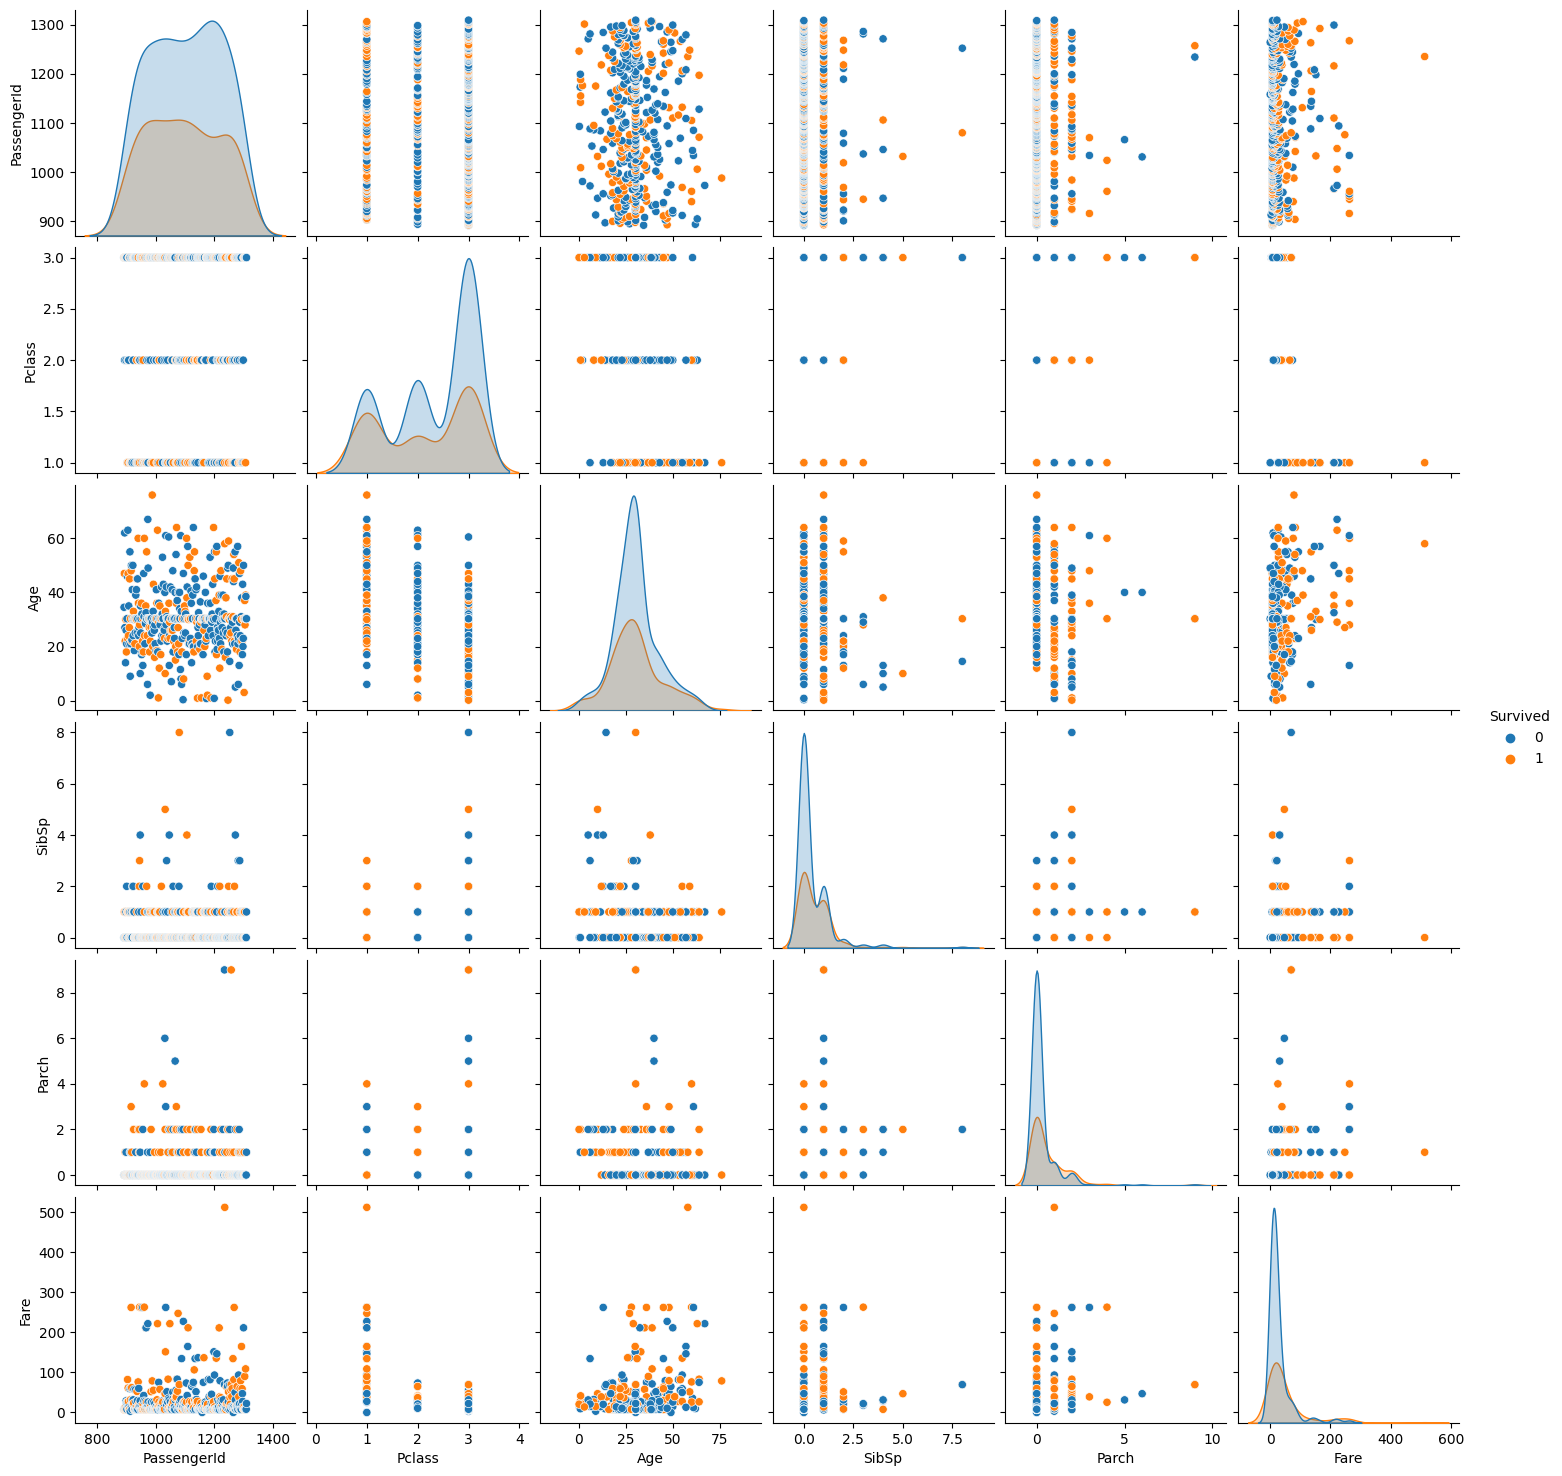

In [22]:
# pairplot
sns.pairplot(data=titanic,hue='Survived')

In [23]:
titanic.corr()

<ipython-input-23-c1c691e9860d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080,0.008209
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191382
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.576619
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171488
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230001
Fare,0.008209,0.191382,-0.576619,0.326800,0.171488,0.230001,1.000000


<ipython-input-24-98b3c1fe26e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(),annot=True,fmt='.3f')


<Axes: >

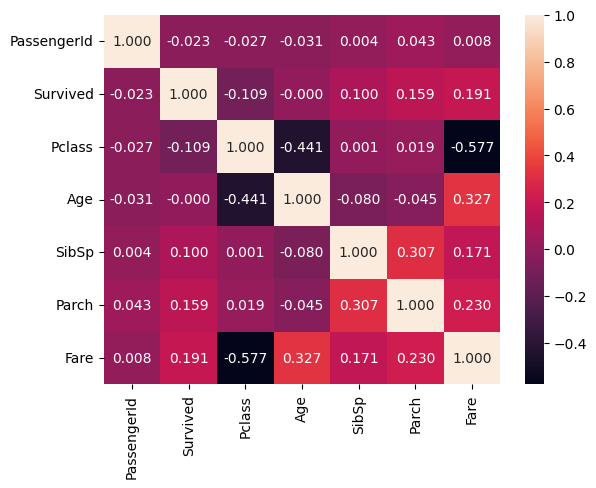

In [24]:
sns.heatmap(titanic.corr(),annot=True,fmt='.3f')

In [25]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic['Sex']=le.fit_transform(titanic['Sex'])
titanic['Embarked']=le.fit_transform(titanic['Embarked'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2


In [26]:
titanic_surv=titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1)
titanic_surv

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


In [27]:
# separating i/p and output
x=titanic_surv.iloc[:,:-1].values
y=titanic_surv.iloc[:,-1].values
print("Dimensions \nX :",x.ndim,"\nY :",y.ndim)

Dimensions 
X : 2 
Y : 1


In [28]:
x

array([[ 0.    ,  3.    ,  1.    , ...,  0.    ,  0.    ,  7.8292],
       [ 1.    ,  3.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  2.    ,  1.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [29]:
y

array([1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,

In [30]:
# splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
x_train

array([[  0.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  75.2417],
       [  0.    ,   3.    ,   1.    , ...,   0.    ,   0.    ,   7.75  ],
       [  1.    ,   1.    ,   0.    , ...,   1.    ,   0.    , 221.7792],
       ...,
       [  0.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  75.2417],
       [  0.    ,   2.    ,   1.    , ...,   0.    ,   0.    ,  13.5   ],
       [  0.    ,   3.    ,   1.    , ...,   0.    ,   0.    ,   7.75  ]])

In [32]:
y_train

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       2, 2, 1, 0, 2, 1])

In [33]:
x_test

array([[0.00000000e+00, 3.00000000e+00, 1.00000000e+00, 2.50000000e+01,
        0.00000000e+00, 0.00000000e+00, 7.22920000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.90000000e+01,
        0.00000000e+00, 0.00000000e+00, 2.11337500e+02],
       [0.00000000e+00, 3.00000000e+00, 1.00000000e+00, 2.10000000e+01,
        0.00000000e+00, 0.00000000e+00, 7.75000000e+00],
       [0.00000000e+00, 3.00000000e+00, 1.00000000e+00, 3.50000000e+01,
        0.00000000e+00, 0.00000000e+00, 7.89580000e+00],
       [1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 3.60000000e+01,
        0.00000000e+00, 2.00000000e+00, 1.21833000e+01],
       [0.00000000e+00, 2.00000000e+00, 1.00000000e+00, 5.00000000e+01,
        1.00000000e+00, 0.00000000e+00, 2.60000000e+01],
       [1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 2.90000000e+01,
        0.00000000e+00, 0.00000000e+00, 7.92500000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.90000000e+01,
        0.00000000e+00, 0

In [34]:
y_test

array([0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2])

In [35]:
# standardization technique used for normalization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.transform(x_train)
x_test=ss.transform(x_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
svm=SVC()
dtc=DecisionTreeClassifier(criterion='entropy')
rfc=RandomForestClassifier()
lst=[knn,nb,svm,dtc,rfc]

In [37]:
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("-"*45)
  print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred))
  print("Accuracy Score :",(accuracy_score(y_test,y_pred)*100),"%\n")

KNeighborsClassifier(n_neighbors=7)
---------------------------------------------
Confusion Matrix :
 [[ 7  1 19]
 [ 0  2 12]
 [ 6  4 75]]
Accuracy Score : 66.66666666666666 %

GaussianNB()
---------------------------------------------
Confusion Matrix :
 [[ 8 11  8]
 [ 0 13  1]
 [ 8 57 20]]
Accuracy Score : 32.53968253968254 %

SVC()
---------------------------------------------
Confusion Matrix :
 [[ 3  1 23]
 [ 0  0 14]
 [ 3  0 82]]
Accuracy Score : 67.46031746031747 %

DecisionTreeClassifier(criterion='entropy')
---------------------------------------------
Confusion Matrix :
 [[18  1  8]
 [ 0  6  8]
 [ 9  3 73]]
Accuracy Score : 76.98412698412699 %

RandomForestClassifier()
---------------------------------------------
Confusion Matrix :
 [[14  0 13]
 [ 1  5  8]
 [ 9  1 75]]
Accuracy Score : 74.60317460317461 %

